You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:
Detect the outliers and remove it using:
1. Mean Function
2. Percentile method
3. IQR(Inter quartile range method)
4. Normal distribution
5. Zscore method

Also, plot the box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column))
Check the correlation between all the numerical columns and plot heatmap.
Scatter plot between the variables to check the correlation between them.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [3]:
df.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [4]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


Here the mean and median of price_per_sqft has huge difference and standard deviation is very much high. So this data must have outliers which should be eliminated without making huge difference in data. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


This shows no null values in any of these columns and the data type of price_per_sqft is integer.

In [6]:
df.shape

(13200, 7)

## Percentile

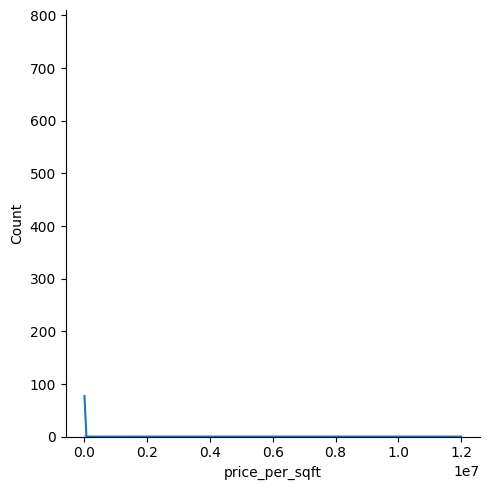

In [7]:
sns.displot(df["price_per_sqft"], kde = True)

<Axes: ylabel='price_per_sqft'>

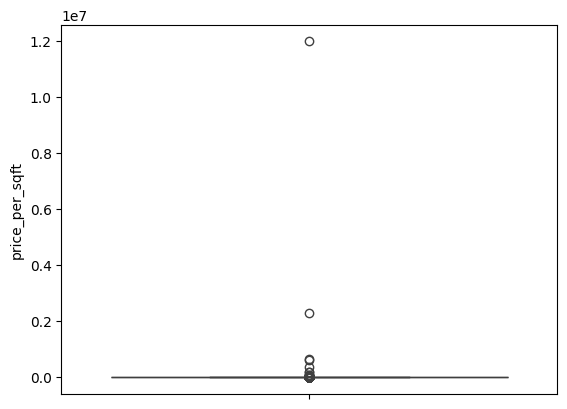

In [8]:
sns.boxplot(df["price_per_sqft"])

In [9]:
df.price_per_sqft.quantile([0.0003,0.0005,0.001, 0.005, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.75, 0.80, 0.85, 0.86, 0.87, 0.88, 0.90])

0.0003      570.0581
0.0005      816.5270
0.0010     1366.1840
0.0050     2398.9050
0.1000     3500.0000
0.2000     4019.0000
0.3000     4499.0000
0.4000     4953.6000
0.5000     5438.0000
0.6000     6000.0000
0.7000     6776.3000
0.7500     7317.0000
0.8000     8019.2000
0.8500     9333.9000
0.8600     9809.2800
0.8700    10086.3900
0.8800    10620.6000
0.9000    11666.0000
Name: price_per_sqft, dtype: float64

In [10]:
Percentile_df = df[(df.price_per_sqft <= df.price_per_sqft.quantile(0.85)) & (df.price_per_sqft >= df.price_per_sqft.quantile(0.0005))]
Percentile_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13193,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


<Axes: ylabel='price_per_sqft'>

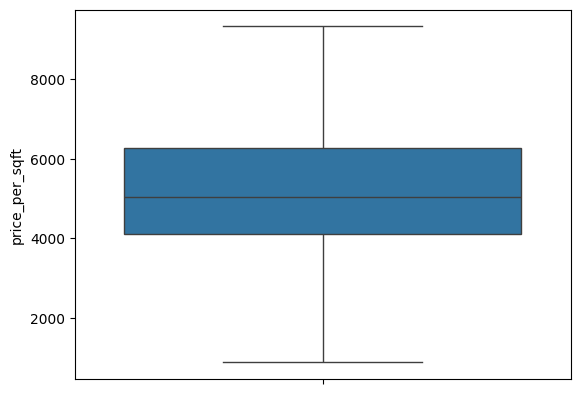

In [11]:
sns.boxplot(Percentile_df["price_per_sqft"])

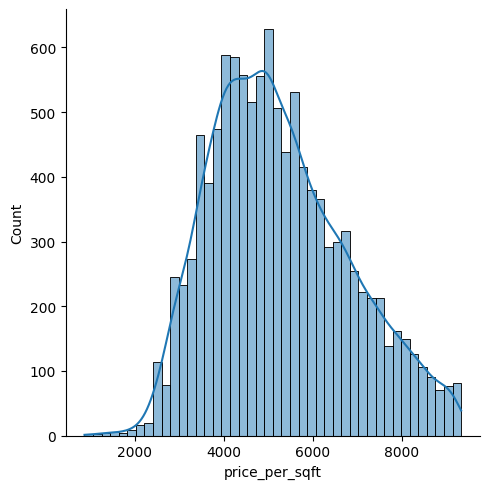

In [12]:
sns.displot(Percentile_df["price_per_sqft"], kde = True)

## IQR(Inter Quartile Range method)

In [13]:
Q1 = df.price_per_sqft.quantile(0.25)
Q3 = df.price_per_sqft.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR 
LL = Q1 - 1.5 * IQR
print("First Quartile: ", Q1) 
print("Third Quartile: ", Q3) 
print("Inter quartile range: ", IQR) 
print("Upper Whisker: ", UL) 
print("Lower Whisker: ", LL)

First Quartile:  4267.0
Third Quartile:  7317.0
Inter quartile range:  3050.0
Upper Whisker:  11892.0
Lower Whisker:  -308.0


In [14]:
IQR_df = df[(df.price_per_sqft <= UL) & (df.price_per_sqft >= LL)]
IQR_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: ylabel='price_per_sqft'>

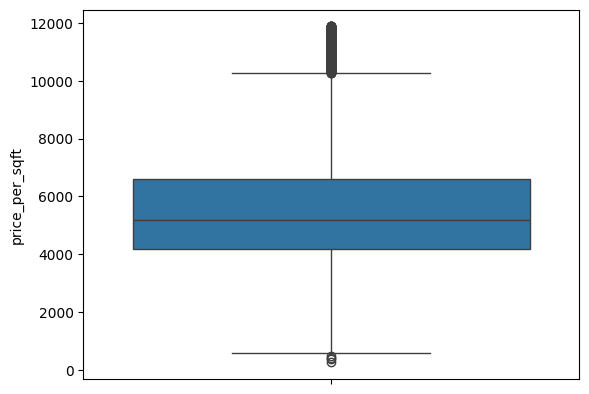

In [15]:
sns.boxplot(IQR_df["price_per_sqft"])

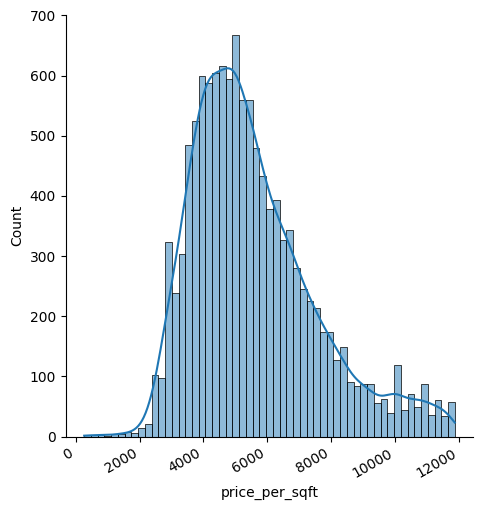

In [16]:
sns.displot(IQR_df["price_per_sqft"], kde = True)
plt.xticks(rotation = 30, ha = "right")
plt.show()

In [17]:
mean = df.price_per_sqft.mean()
sigma = df.price_per_sqft.std() 
print("Mean: ", mean, "\nStandard Deviation: ", sigma)

Mean:  7920.336742424242 
Standard Deviation:  106727.16032810867


## Normal Distribution

In [18]:
Upper_limit = mean + 3 * sigma 
Lower_limit = mean - 3 * sigma 
print("Upper Limit: ", Upper_limit, "\nLower Limit: ", Lower_limit)

Upper Limit:  328101.8177267502 
Lower Limit:  -312261.14424190175


In [19]:
Normal_dbn_df = df[(df.price_per_sqft <= Upper_limit) & (df.price_per_sqft >= Lower_limit)]
Normal_dbn_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: ylabel='price_per_sqft'>

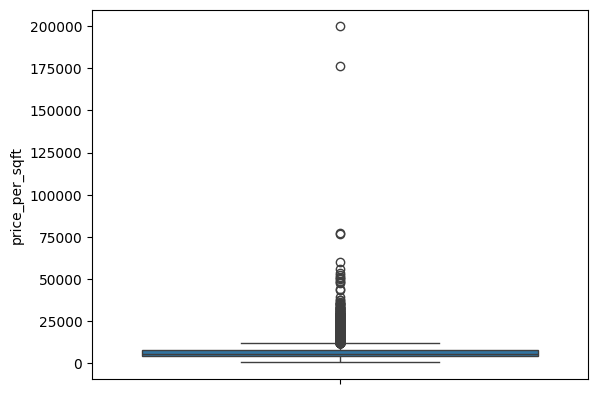

In [20]:
sns.boxplot(Normal_dbn_df["price_per_sqft"])

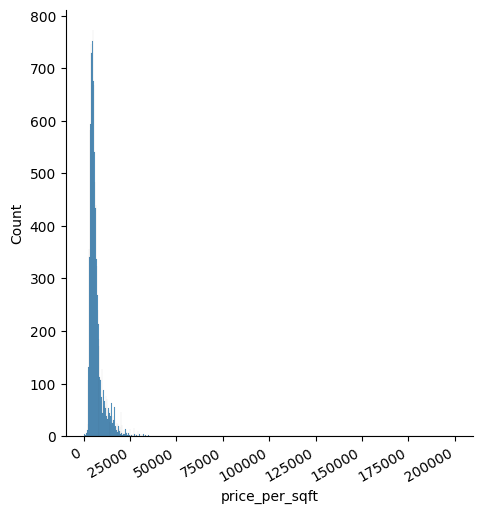

In [21]:
sns.displot(Normal_dbn_df["price_per_sqft"])
plt.xticks(rotation = 30, ha = "right")
plt.show()

## Z score method

In [22]:
Z_score_df = df.copy()
Z_score_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [23]:
Z_score_df["Z Score"] = (df.price_per_sqft - mean) / sigma 
Z_score_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z Score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


In [24]:
Z_Score_df = Z_score_df[(Z_score_df["Z Score"] <= 3) & (Z_score_df["Z Score"] >= -3)] 
Z_Score_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z Score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


<Axes: ylabel='price_per_sqft'>

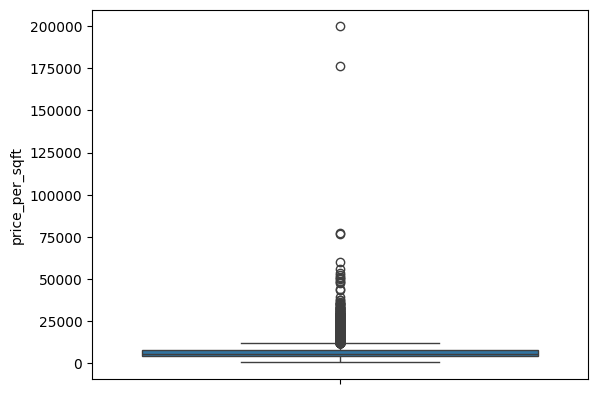

In [25]:
sns.boxplot(Z_Score_df["price_per_sqft"]) 

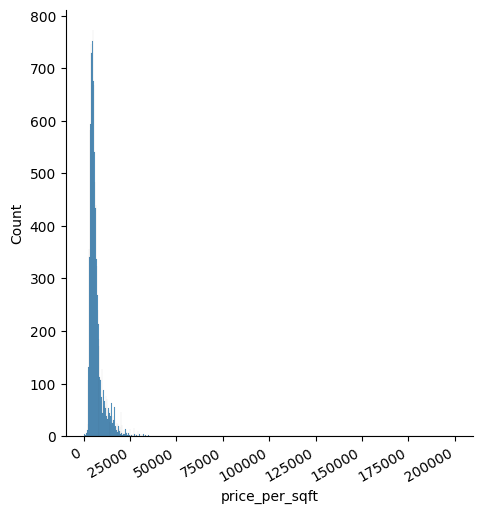

In [26]:
sns.displot(Z_Score_df["price_per_sqft"])
plt.xticks(rotation = 30, ha = "right")
plt.show()

For this data, the best method for removing the outlier will be the percentile and IQR method. The normal distribution and z score method can't remove the outliers as the data is skewed.

## Boxplot for all numerical columns

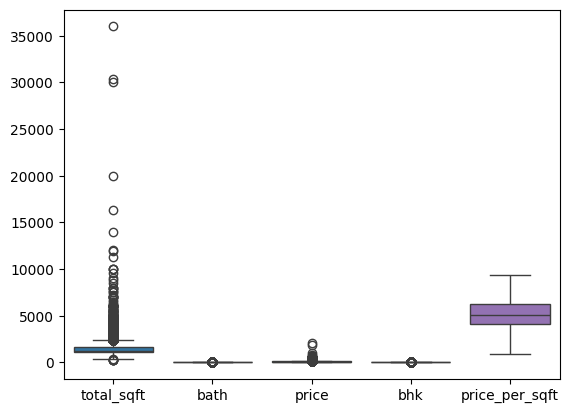

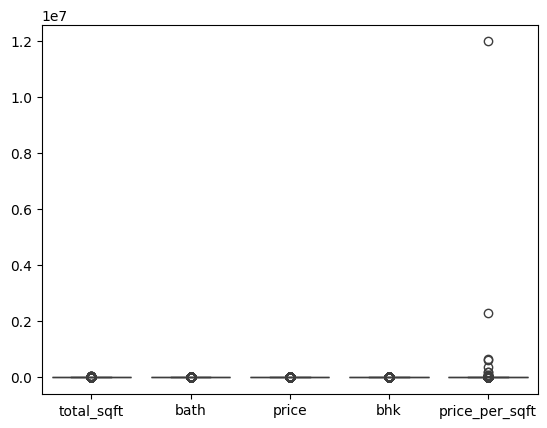

In [27]:
sns.boxplot(Percentile_df.select_dtypes(include = [np.number])) 
plt.show()
sns.boxplot(df.select_dtypes(include = [np.number])) 
plt.show()

## Histogram

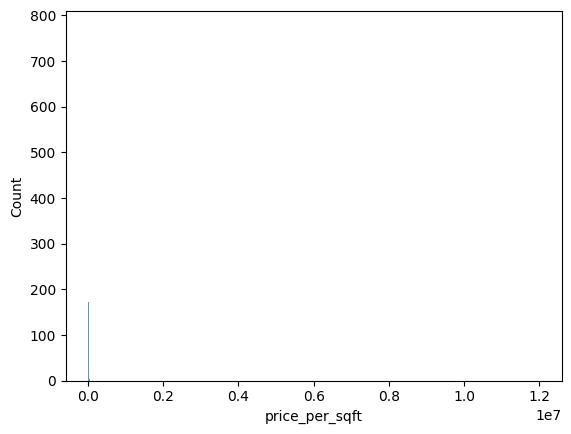

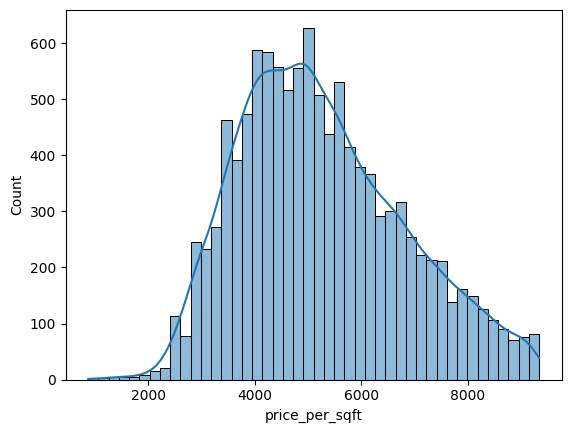

In [28]:
sns.histplot(df.price_per_sqft)
plt.show()

sns.histplot(Percentile_df.price_per_sqft, kde = True) 
plt.show()

## Correlation of all numerical columns

In [29]:
Correlation = df.select_dtypes(include = [np.number]).corr()
Correlation

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


## Heatmap

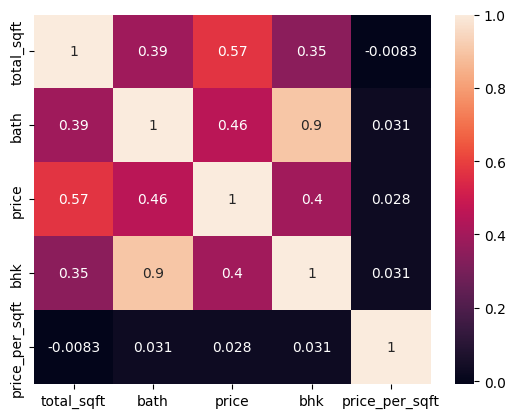

In [30]:
Heatmap = sns.heatmap(Correlation, annot = True)

The heat map shows that the columns 'bath' and 'bhk' are highly correlated, so we can remove any of them for the analysis. This can help to reduce the multicollinearity.